In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
ls saved_model

model_age_all/  model_age_no_children/


In [3]:
new_model = tf.keras.models.load_model('saved_model/model_age_all')

In [4]:
data = pd.read_csv("age_gender.csv")
data = data[data['age'] <= 90]
x = data["pixels"]
y_age = np.array(data["age"])

In [5]:
x = x.apply(lambda x: x.split(' '))
x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))
x = np.array(x)
x = np.stack(np.array(x), axis=0)
x = np.reshape(x, (-1, 48, 48))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y_age, test_size=0.2, random_state=1)
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

y_test = y_test.astype(np.float32)
y_train = y_train.astype(np.float32)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)
print("y_train.shape: ", y_train.shape)

x_train shape:  (18894, 48, 48)
x_test shape:  (4724, 48, 48)
y_test.shape:  (4724,)
y_train.shape:  (18894,)


In [7]:
x_train = x_train.reshape(-1,48,48,1)

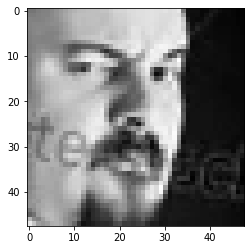

Wiek prognozowany: [[48.010117]]
Wiek referencyjny: 37.0


In [13]:
num = 1456
plt.imshow(x_test[num].reshape(48,48), cmap="gray")
plt.show()
x1 = x_test[num].reshape(1,48,48,1)
y1 = new_model.predict(x1)
print(f"Wiek prognozowany: {y1}")
print(f"Wiek referencyjny: {y_test[num]}")